/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Resultados para Árbol de Decisión:
Accuracy: 0.3333

Classification Report:
 {'Perder': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 2.0}, 'Ganar': {'precision': 0.5, 'recall': 0.25, 'f1-score': 0.3333333333333333, 'support': 4.0}, 'accuracy': 0.3333333333333333, 'macro avg': {'precision': 0.375, 'recall': 0.375, 'f1-score': 0.3333333333333333, 'support': 6.0}, 'weighted avg': {'precision': 0.4166666666666667, 'recall': 0.3333333333333333, 'f1-score': 0.3333333333333333, 'support': 6.0}}


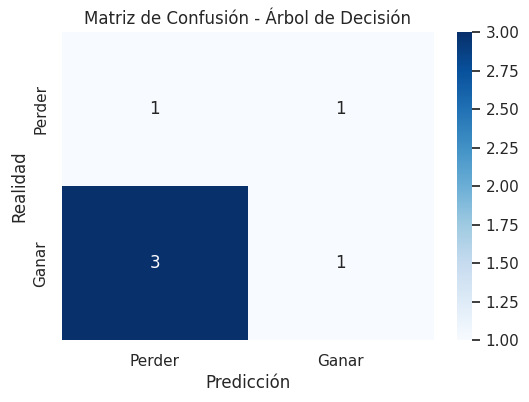


Resultados para Random Forest:
Accuracy: 0.8333

Classification Report:
 {'Perder': {'precision': 0.6666666666666666, 'recall': 1.0, 'f1-score': 0.8, 'support': 2.0}, 'Ganar': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 4.0}, 'accuracy': 0.8333333333333334, 'macro avg': {'precision': 0.8333333333333333, 'recall': 0.875, 'f1-score': 0.8285714285714285, 'support': 6.0}, 'weighted avg': {'precision': 0.8888888888888888, 'recall': 0.8333333333333334, 'f1-score': 0.8380952380952381, 'support': 6.0}}


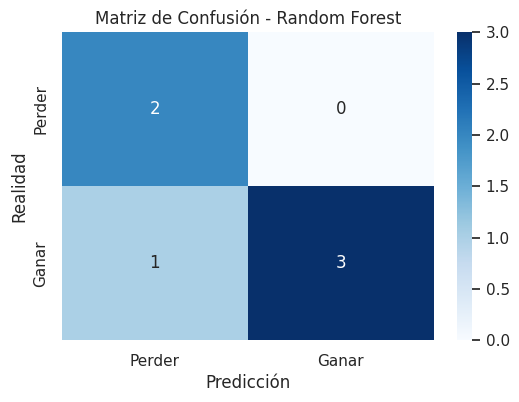


Resultados para Máquinas de Vectores de Soporte (SVM):
Accuracy: 0.3333

Classification Report:
 {'Perder': {'precision': 0.3333333333333333, 'recall': 1.0, 'f1-score': 0.5, 'support': 2.0}, 'Ganar': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0}, 'accuracy': 0.3333333333333333, 'macro avg': {'precision': 0.16666666666666666, 'recall': 0.5, 'f1-score': 0.25, 'support': 6.0}, 'weighted avg': {'precision': 0.1111111111111111, 'recall': 0.3333333333333333, 'f1-score': 0.16666666666666666, 'support': 6.0}}


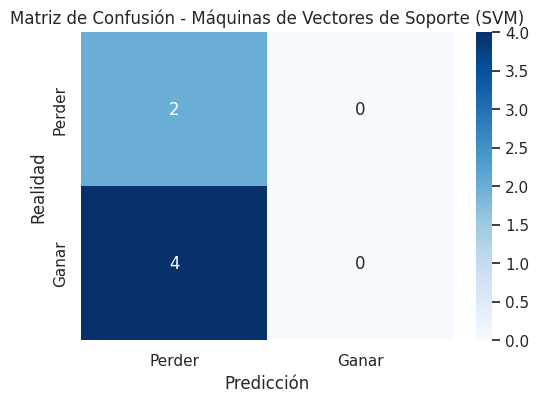


Resultados para Redes Neuronales:
Accuracy: 0.3333

Classification Report:
 {'Perder': {'precision': 0.3333333333333333, 'recall': 1.0, 'f1-score': 0.5, 'support': 2.0}, 'Ganar': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0}, 'accuracy': 0.3333333333333333, 'macro avg': {'precision': 0.16666666666666666, 'recall': 0.5, 'f1-score': 0.25, 'support': 6.0}, 'weighted avg': {'precision': 0.1111111111111111, 'recall': 0.3333333333333333, 'f1-score': 0.16666666666666666, 'support': 6.0}}


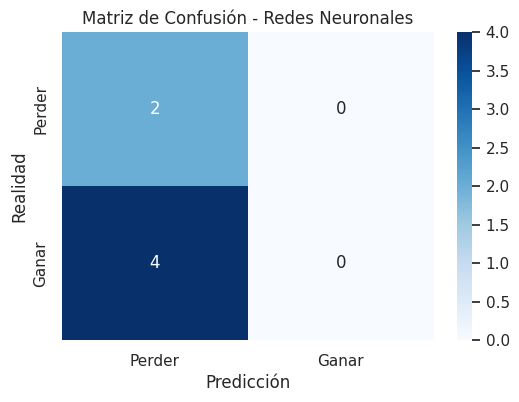

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'Dataset_modificado.csv'  # Cambia el path al archivo que subiste
df = pd.read_csv(file_path)

# Preprocesamiento
df = df.dropna()

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Partidos jugados', 'Goles anotados', 'Goles recibidos', 'Tiros al arco',
        'Valores de la plantilla (M)', 'Edad Promedio', 'Prestigio',
        'Partidos Ganados Local', 'Partidos Perdidos Local', 'Partidos Empatados Local',
        'Partidos Ganados Visitante', 'Partidos Perdidos Visitante', 'Partidos Empatados Visitante']]

# Crear la variable objetivo 'Resultado'
# 1 = Ganar, -1 = Perder
y = []
for _, row in df.iterrows():
    if row['Partidos Ganados'] > row['Partidos Perdidos']:
        y.append(1)  # Ganar
    else:
        y.append(-1)  # Perder
y = pd.Series(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Perder', 'Ganar'], output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

# Evaluar modelos
models = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Máquinas de Vectores de Soporte (SVM)": SVC(random_state=42),
    "Redes Neuronales": MLPClassifier(random_state=42, max_iter=500)
}

results = {}

for name, model in models.items():
    accuracy, report, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        "Accuracy": accuracy,
        "Report": report,
        "Confusion Matrix": cm
    }

# Mostrar resultados
for name, result in results.items():
    print(f"\nResultados para {name}:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"\nClassification Report:\n {result['Report']}")

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Perder', 'Ganar'], yticklabels=['Perder', 'Ganar'])
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
